In [1]:
import pandas as pd
import numpy as np
import sportsdataverse 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)


### Load in data using the sportsdataverse API 

In [2]:
mbb_df = sportsdataverse.mbb.load_mbb_team_boxscore(seasons=range(2022,2023))
mbb_df.head()

,team_short_display_name,team_uid,team_alternate_color,team_color,team_display_name,team_name,team_logo,team_location,team_id,team_abbreviation,team_slug,field_goals_made_field_goals_attempted,field_goal_pct,three_point_field_goals_made_three_point_field_goals_attempted,three_point_field_goal_pct,free_throws_made_free_throws_attempted,free_throw_pct,total_rebounds,offensive_rebounds,defensive_rebounds,team_rebounds,assists,steals,blocks,turnovers,team_turnovers,total_turnovers,technical_fouls,total_technical_fouls,flagrant_fouls,fouls,largest_lead,home_away,opponent_id,opponent_name,opponent_mascot,opponent_abbrev,game_id,season,season_type,game_date
0,Iowa,s:40~l:41~t:2294,ffe100,000000,Iowa Hawkeyes,Hawkeyes,https://a.espncdn.com/i/teamlogos/ncaa/500/229...,Iowa,2294,IOWA,iowa-hawkeyes,25-62,40.3,5-21,23.8,15-22,68.2,30,6,24,0,12,6,0,9,0,9,0,0,0,29,1,HOME,2509,Purdue,Boilermakers,PUR,401364342,2022,2,2021-12-04
1,Purdue,s:40~l:41~t:2509,a4a9ad,B89D29,Purdue Boilermakers,Boilermakers,https://a.espncdn.com/i/teamlogos/ncaa/500/250...,Purdue,2509,PUR,purdue-boilermakers,21-50,42.0,8-19,42.1,27-37,73.0,42,8,34,0,14,5,2,17,2,17,0,0,0,18,19,AWAY,2294,Iowa,Hawkeyes,IOWA,401364342,2022,2,2021-12-04
2,Rutgers,s:40~l:41~t:164,ffffff,d21034,Rutgers Scarlet Knights,Scarlet Knights,https://a.espncdn.com/i/teamlogos/ncaa/500/164...,Rutgers,164,RUTG,rutgers-scarlet-knights,21-68,30.9,7-17,41.2,2-4,50.0,33,13,20,0,14,5,2,14,1,14,2,2,0,15,3,HOME,356,Illinois,Fighting Illini,ILL,401364343,2022,2,2021-12-04
3,Illinois,s:40~l:41~t:356,fa6300,f77329,Illinois Fighting Illini,Fighting Illini,https://a.espncdn.com/i/teamlogos/ncaa/500/356...,Illinois,356,ILL,illinois-fighting-illini,32-66,48.5,12-33,36.4,10-11,90.9,47,13,34,0,19,8,6,10,0,10,0,0,0,10,35,AWAY,164,Rutgers,Scarlet Knights,RUTG,401364343,2022,2,2021-12-04
4,Nebraska,s:40~l:41~t:158,f5f1e7,F20017,Nebraska Cornhuskers,Cornhuskers,https://a.espncdn.com/i/teamlogos/ncaa/500/158...,Nebraska,158,NEB,nebraska-cornhuskers,23-61,37.7,5-22,22.7,4-5,80.0,32,5,27,0,9,9,1,14,0,14,0,0,0,18,10,HOME,84,Indiana,Hoosiers,IU,401364344,2022,2,2021-12-04


### Visualize columns to familiarize self with data

In [3]:
mbb_df.columns

Index(['team_short_display_name', 'team_uid', 'team_alternate_color',
       'team_color', 'team_display_name', 'team_name', 'team_logo',
       'team_location', 'team_id', 'team_abbreviation', 'team_slug',
       'field_goals_made_field_goals_attempted', 'field_goal_pct',
       'three_point_field_goals_made_three_point_field_goals_attempted',
       'three_point_field_goal_pct', 'free_throws_made_free_throws_attempted',
       'free_throw_pct', 'total_rebounds', 'offensive_rebounds',
       'defensive_rebounds', 'team_rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'team_turnovers', 'total_turnovers', 'technical_fouls',
       'total_technical_fouls', 'flagrant_fouls', 'fouls', 'largest_lead',
       'home_away', 'opponent_id', 'opponent_name', 'opponent_mascot',
       'opponent_abbrev', 'game_id', 'season', 'season_type', 'game_date'],
      dtype='object')

### Create SEC team list

In [4]:
sec_teams = ['Alabama', 'Auburn', 'Arkansas', 'Kentucky', 'Tennessee', 'Mississippi St', 'Ole Miss', 'Florida', 'LSU', 'Vanderbilt', 'Texas A&M', 'South Carolina', 'Missouri', 'Georgia']
sec_teams.sort()

### Change instances where Mississippi State was labeled differently in the 'opponent_name' column
Very important to have consistency in data

In [5]:
miss_st_df = mbb_df.loc[mbb_df['opponent_name']=='Mississippi State']
miss_st_df['opponent_name'] = 'Mississippi St'
mbb_df.loc[miss_st_df.index.values] = miss_st_df

### Filter opponents so only SEC conference games are shown

In [6]:
sec_conf_games = mbb_df.loc[((mbb_df['team_short_display_name'].isin(sec_teams)) & (mbb_df['opponent_name']).isin(sec_teams))]

### Visualize Dataframe

In [7]:
sec_conf_games.head()

,team_short_display_name,team_uid,team_alternate_color,team_color,team_display_name,team_name,team_logo,team_location,team_id,team_abbreviation,team_slug,field_goals_made_field_goals_attempted,field_goal_pct,three_point_field_goals_made_three_point_field_goals_attempted,three_point_field_goal_pct,free_throws_made_free_throws_attempted,free_throw_pct,total_rebounds,offensive_rebounds,defensive_rebounds,team_rebounds,assists,steals,blocks,turnovers,team_turnovers,total_turnovers,technical_fouls,total_technical_fouls,flagrant_fouls,fouls,largest_lead,home_away,opponent_id,opponent_name,opponent_mascot,opponent_abbrev,game_id,season,season_type,game_date
302,Missouri,s:40~l:41~t:142,000000,000000,Missouri Tigers,Tigers,https://a.espncdn.com/i/teamlogos/ncaa/500/142...,Missouri,142,MIZ,missouri-tigers,22-67,32.8,5-25,20.0,7-10,70.0,35,9,26,0,9,3,3,14,0,14,0,0,0,23,1,HOME,96,Kentucky,Wildcats,UK,401364839,2022,2,2021-12-30
303,Kentucky,s:40~l:41~t:96,ffffff,005DAA,Kentucky Wildcats,Wildcats,https://a.espncdn.com/i/teamlogos/ncaa/500/96.png,Kentucky,96,UK,kentucky-wildcats,28-65,43.1,5-17,29.4,22-26,84.6,49,13,36,0,12,8,4,11,0,11,0,0,0,13,27,AWAY,142,Missouri,Tigers,MIZ,401364839,2022,2,2021-12-30
304,Tennessee,s:40~l:41~t:2633,ffffff,EE9627,Tennessee Volunteers,Volunteers,https://a.espncdn.com/i/teamlogos/ncaa/500/263...,Tennessee,2633,TENN,tennessee-volunteers,22-63,34.9,7-29,24.1,17-20,85.0,35,10,25,0,10,10,2,11,0,11,0,0,0,19,10,HOME,333,Alabama,Crimson Tide,ALA,401364841,2022,2,2021-12-30
305,Alabama,s:40~l:41~t:333,f1f2f3,690014,Alabama Crimson Tide,Crimson Tide,https://a.espncdn.com/i/teamlogos/ncaa/500/333...,Alabama,333,ALA,alabama-crimson-tide,26-60,43.3,7-31,22.6,14-21,66.7,43,11,32,0,11,7,3,15,0,15,0,0,0,17,5,AWAY,2633,Tennessee,Volunteers,TENN,401364841,2022,2,2021-12-30
306,LSU,s:40~l:41~t:99,2b0d57,fdd023,LSU Tigers,Tigers,https://a.espncdn.com/i/teamlogos/ncaa/500/99.png,LSU,99,LSU,lsu-tigers,18-63,28.6,6-29,20.7,13-20,65.0,37,15,22,0,4,9,2,17,0,17,0,0,0,21,1,HOME,2,Auburn,Tigers,AUB,401364842,2022,2,2021-12-30


### Through analysis in the dataframe, I deteremined that the API actually reads in the home_away column incorrectly. Addressed below

In [8]:
sec_conf_games = sec_conf_games.reset_index()
sec_conf_games.loc[sec_conf_games.home_away == 'HOME', 'home_away'] ='temp'
sec_conf_games.loc[sec_conf_games.home_away == 'AWAY', 'home_away'] ='HOME'
sec_conf_games.loc[sec_conf_games.home_away == 'temp', 'home_away'] ='AWAY'

In [9]:
sec_conf_games.iloc[0]

index                                                                                                           302
team_short_display_name                                                                                    Missouri
team_uid                                                                                            s:40~l:41~t:142
team_alternate_color                                                                                         000000
team_color                                                                                                   000000
team_display_name                                                                                   Missouri Tigers
team_name                                                                                                    Tigers
team_logo                                                         https://a.espncdn.com/i/teamlogos/ncaa/500/142...
team_location                                                           

### Create a foul_differential column in the data

In [10]:
game_ids = sec_conf_games['game_id'].tolist()
# Instantiate Foul Differential Column
sec_conf_games['foul_differential'] = 9999
# Create for loop for each game 
for game in game_ids:
    # Seperate the home and away games
    temp_df = sec_conf_games.loc[sec_conf_games['game_id']==game]
    home_df = temp_df.loc[temp_df['home_away']=='HOME']
    away_df = temp_df.loc[temp_df['home_away']=='AWAY']
    # Get foul values
    fouls = home_df['fouls'].values
    fouls = int(fouls)
    # Get opponent fouls
    opp_fouls = away_df['fouls'].values
    opp_fouls = int(opp_fouls)
    # Calculate foul difference
    diff = fouls-opp_fouls
    home_df['foul_differential'] = diff
    away_df['foul_differential'] = diff*-1
    sec_conf_games.loc[(sec_conf_games['game_id']==game) & (sec_conf_games['home_away']=='HOME'), 'foul_differential'] = home_df['foul_differential'].values
    sec_conf_games.loc[(sec_conf_games['game_id']==game) & (sec_conf_games['home_away']=='AWAY'), 'foul_differential'] = away_df['foul_differential'].values

### Verify that the each game's foul differentials are opposite zero from one another

In [11]:
sec_conf_games['foul_differential']

0      10
1     -10
2       2
3      -2
4       1
       ..
169    -1
170     3
171    -3
172     0
173     0
Name: foul_differential, Length: 174, dtype: int64

### Create a fouls data frame and group it by team name, logo and home/away. Also, get the median value for foul differential for each 

In [12]:
fouls_df = sec_conf_games[['team_short_display_name', 'home_away', 'foul_differential','team_logo']]

grouped_fouls = fouls_df.groupby(['team_short_display_name','team_logo', 'home_away']).agg('median')

In [13]:
grouped_fouls

foul_differential
team_short_display_name team_logo                                          home_away                   
Alabama                 https://a.espncdn.com/i/teamlogos/ncaa/500/333.png AWAY                     3.5
                                                                           HOME                    -4.0
Arkansas                https://a.espncdn.com/i/teamlogos/ncaa/500/8.png   AWAY                    -1.0
                                                                           HOME                    -4.5
Auburn                  https://a.espncdn.com/i/teamlogos/ncaa/500/2.png   AWAY                     5.5
                                                                           HOME                    -1.5
Florida                 https://a.espncdn.com/i/teamlogos/ncaa/500/57.png  AWAY                     0.0
                                                                           HOME                     0.5
Georgia                 https://a.espncdn.com/i/teamlogos/ncaa/500/61.png  AWAY                    -2.5
                                                                           HOME                    -3.0
Kentucky                https://a.espncdn.com/i/teamlogos/ncaa/500/96.png  AWAY                    -1.0
                                                                           HOME                    -3.5
LSU                     https://a.espncdn.com/i/teamlogos/ncaa/500/99.png  AWAY                     5.0
                                                                           HOME                     4.0
Mississippi St          https://a.espncdn.com/i/teamlogos/ncaa/500/344.png AWAY                     0.0
                                                                           HOME                    -1.0
Missouri                https://a.espncdn.com/i/teamlogos/ncaa/500/142.png AWAY                     7.0
                                                                           HOME                     3.0
Ole Miss                https://a.espncdn.com/i/teamlogos/ncaa/500/145.png AWAY                    -2.0
                                                                           HOME                     0.0
South Carolina          https://a.espncdn.com/i/teamlogos/ncaa/500/2579... AWAY                     1.0
                                                                           HOME                     0.5
Tennessee               https://a.espncdn.com/i/teamlogos/ncaa/500/2633... AWAY                     2.0
                                                                           HOME                    -3.0
Texas A&M               https://a.espncdn.com/i/teamlogos/ncaa/500/245.png AWAY                     2.5
                                                                           HOME                     3.0
Vanderbilt              https://a.espncdn.com/i/teamlogos/ncaa/500/238.png AWAY                     2.5
                                                                           HOME                    -1.5

In [14]:
grouped_fouls_df = grouped_fouls.reset_index()

### Get most recent game date (for graph later)

In [15]:
most_recent_game = sec_conf_games['game_date'].max()
print(most_recent_game)

2022-02-16


### Create function that can be called to develop a scatterplot with teams foul breakdowns

In [16]:
def scatter_plot_with_logos(X,Y,teams):   
    # Create empty artist list
    artists = []
    # create for loop for home foul, away foul, team pairs 
    for h,a,team in zip(X,Y,teams):
        # get image from the team dataframe
        temp_df = sec_conf_games.loc[sec_conf_games['team_short_display_name']==team]
        im = temp_df.iloc[1]['team_logo']
        # Plot the point on the graph
        plt.plot(h,a,markersize=16)
        # Derive the image from the link
        im = plt.imread(im)
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (h, a), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    # After for loop, plot mean values as lines on the graph
    ax.plot(np.mean(X), np.mean(Y))
    plt.axhline(y=np.mean(Y), color = 'r', linestyle = '--')
    plt.axvline(x=np.mean(X), color = 'r', linestyle ='--')
    # Create titles and axis labels
    ax.set_ylabel('Median Away Foul Differential')
    ax.set_xlabel('Median Home Foul Differential')
    ax.set_title(f'SEC Home/Away Foul Splits in Conference Play (Updated {most_recent_game})')

### Define inputs to the function and create the graph

Text(1, 5, 'Foul Disadvantage At Home\nFoul Disadvantage On Road')

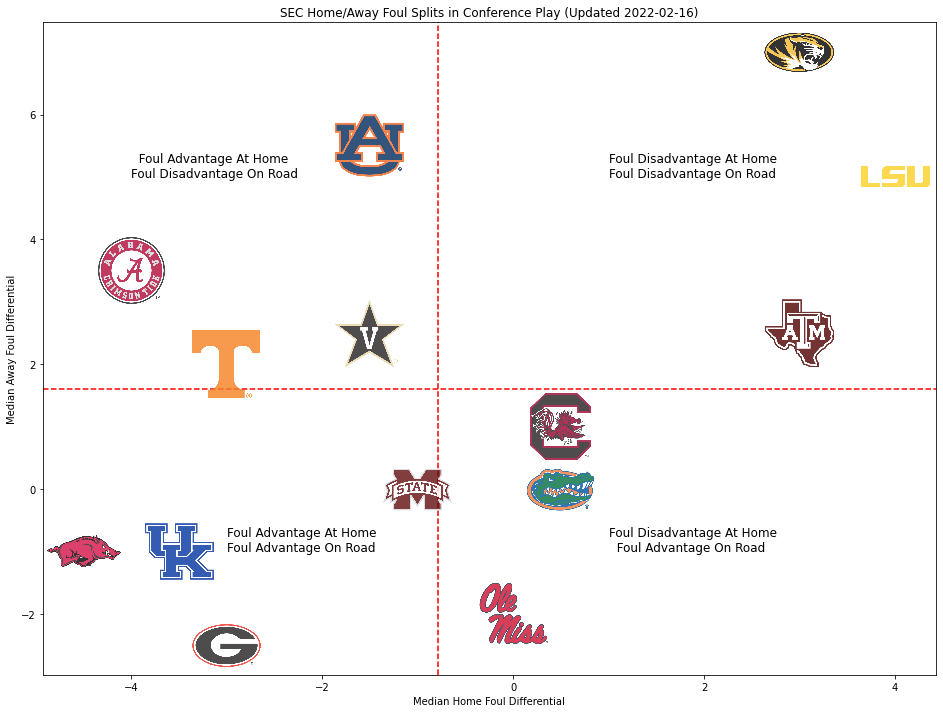

In [17]:
fig, ax = plt.subplots(figsize=(16,12))
home_df = grouped_fouls_df[grouped_fouls_df['home_away']=='HOME']
away_df = grouped_fouls_df[grouped_fouls_df['home_away']=='AWAY']
fouls_home = home_df['foul_differential'].values
fouls_away = away_df['foul_differential'].values


scatter_plot_with_logos(fouls_home, fouls_away, sec_teams)
#Create Annotations for Clarity 
plt.text(-3, -1,'Foul Advantage At Home\nFoul Advantage On Road', fontsize = 'large', fontname = 'sans-serif')
plt.text(1, -1, 'Foul Disadvantage At Home\n  Foul Advantage On Road', fontsize = 'large', fontname = 'sans-serif')
plt.text(-4, 5, '  Foul Advantage At Home\nFoul Disadvantage On Road', fontsize = 'large', fontname = 'sans-serif' )
plt.text(1,5, 'Foul Disadvantage At Home\nFoul Disadvantage On Road', fontsize = 'large', fontname = 'sans-serif')

### Analysis

##### Teams in the bottom left quadrant have a negative median foul differential both at home and on the road - meaning they generally have fewer fouls called on them than their opponents
##### Teams in the top left quadrant have a negative median foul differential at home and a positive median foul differential on the road - meaning they generally have fewer fouls called on them at home and more fouls called on them on the road when compared to their opponents 
##### Teams in the bottom right quadrant have a positive median foul differential at home and a negative median foul differential on the road - meaning they generally have more fouls called on them at home and fewer fouls called on them on the road when compared to their opponents 
##### Teams in the top right quadrant have a positive median foul differential both at home and on the road - meaning they generally have more fouls called on them than their opponents
